## 1: The Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


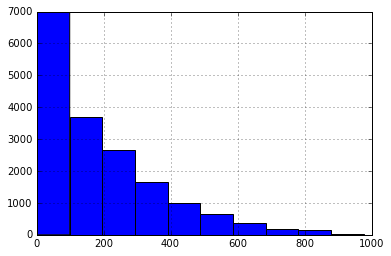

In [2]:
bike_rentals['cnt'].hist()

In [3]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

## 2: Calculating Features

In [4]:
def assign_label(row):
    if row>=6 & row<12: return 1
    elif row>=12 & row<18: return 2
    elif row>=18 & row<24: return 3
    elif row>=0 & row<6: return 4
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


## 3: Train/Test Split

### Error metric
The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [5]:
train = bike_rentals.sample(frac=0.8)
test = bike_rentals[~bike_rentals.index.isin(train.index)]

## 4: Applying Linear Regression

In [6]:
cols = list(bike_rentals.columns[:len(bike_rentals.columns)-4])
cols.append('time_label')
cols.remove('dteday')

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[cols],train['cnt'])
predictions = lr.predict(test[cols])

In [8]:
import numpy as np
np.mean((predictions - test["cnt"]) ** 2)

20123.552592356871

In [9]:
predictions

array([ -71.63513574,    0.4300909 ,   25.91862088, ...,  201.60620594,
        207.57880685,  208.31828514])

In [10]:
test['cnt']

0         16
8          8
9         14
23        39
25        17
26         9
51        30
53       154
54        88
60        72
70         2
74        36
78        42
80        78
88        54
89        48
96         3
98        88
107       89
114       19
115       11
116        4
133      112
140        1
144       84
151       50
192        6
199       72
201       92
202       62
        ... 
17254     35
17258     10
17277    197
17280     63
17299    250
17301    213
17304     92
17307     26
17315     44
17320     84
17322    129
17331     41
17333     19
17334     15
17338     13
17341    122
17342    136
17344    169
17347    133
17348    123
17350    102
17353     36
17355     34
17360      9
17361     40
17363    196
17370    315
17372    164
17373    122
17376     90
Name: cnt, dtype: int64

### Error
The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

## 5: Applying Decision Trees

In [11]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(train[cols],train['cnt'])
preds = dt.predict(test[cols])

In [12]:
np.mean((preds - test["cnt"]) ** 2)

3216.2287111622554

In [13]:
dt = DecisionTreeRegressor(min_samples_leaf=2)
dt.fit(train[cols],train['cnt'])
preds = dt.predict(test[cols])
np.mean((preds - test["cnt"]) ** 2)

2924.1037750926989

### Decision tree error
By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

## 6: Applying Random Forests

In [14]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[cols], train["cnt"])
predictions = reg.predict(test[cols])
np.mean((predictions - test["cnt"]) ** 2)

2118.2246863541191

### Random forest error
By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.